In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.utils import resample

In [2]:
df_cases = pd.read_csv('cases.csv')
df_cases = df_cases.rename(columns={'Unnamed: 0': 'patient_id'})

In [3]:
print('Num cases:', len(df_cases))

Num cases: 5267


In [4]:
df_cases

,patient_id,subject_num,birth_date,table1_narrow_count,table1_narrow_start,table1_narrow_start_age,table1_broad_count,table1_broad_start,table1_broad_start_age,table1_hybrid_count,...,table2_count,table2_start,table2_start_age,table3_count,table3_start,table1_count,table1_start,table1_start_age,index_date,index_age
0,184,10159284,1986-04-26,1,2007-05-12,21.1,2,2007-05-12,21.1,2,...,0,NaN,NaN,1,2007-05-12,2,2007-05-12,21.1,2007-05-12,21.1
1,207,11479020,1987-08-31,6,2008-10-12,21.1,8,2006-02-06,18.4,7,...,0,NaN,NaN,0,NaN,8,2006-02-06,18.4,2006-02-06,18.4
2,239,12160476,1987-08-20,15,2019-12-09,32.3,15,2019-12-09,32.3,15,...,0,NaN,NaN,0,NaN,15,2019-12-09,32.3,2019-12-09,32.3
3,337,12061753,1986-05-10,9,2014-08-31,28.3,9,2014-08-31,28.3,9,...,0,NaN,NaN,5,2014-08-31,9,2014-08-31,28.3,2014-08-31,28.3
4,436,12752558,2001-08-14,24,2020-02-28,18.6,24,2020-02-28,18.6,24,...,0,NaN,NaN,0,NaN,24,2020-02-28,18.6,2020-02-28,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,1328341,12419659,1992-09-28,3,2019-02-21,26.4,3,2019-02-21,26.4,3,...,0,NaN,NaN,0,NaN,3,2019-02-21,26.4,2019-02-21,26.4
5263,1328521,10428995,2002-09-02,2,2020-05-17,17.7,10,2020-04-30,17.7,10,...,0,NaN,NaN,0,NaN,10,2020-04-30,17.7,2020-04-30,17.7
5264,1328731,12456174,1993-06-11,2,2018-10-23,25.4,2,2018-10-23,25.4,2,...,0,NaN,NaN,0,NaN,2,2018-10-23,25.4,2018-10-23,25.4
5265,1329127,11048025,2003-02-23,2,2019-01-19,15.9,2,2019-01-19,15.9,2,...,0,NaN,NaN,0,NaN,2,2019-01-19,15.9,2019-01-19,15.9


In [5]:
df_race = pd.read_csv('./No_Race_Data/demographics.csv')
df_race

,subject_num,gender,sbirth_date,race,veteran,marital_status,ethnicity,deceased,sdeath_date,biobank_genotyped,current_zip3,currentzip_medianincome_2010,visit_count,fact_count,icd_count,icd_first_sdate,cpt_count,cpt_first_sdate,public_payer,notes_ct
0,10985687,M,1969-06-16,Black,U,Married,Non-Hispanic,N,NaN,NaN,020,69340.0,49.0,547.0,231.0,05/03/1998,261.0,05/03/1998,0,94.0
1,11664128,F,1966-10-02,White,U,Single,Non-Hispanic,Y,09/20/2008,NaN,020,85131.0,91.0,710.0,391.0,09/08/1999,312.0,09/08/1999,1,145.0
2,12095563,F,1970-08-10,Unknown,N,Single,Hispanic,N,NaN,NaN,021,30282.0,304.0,1615.0,693.0,01/17/1998,745.0,01/17/1998,1,353.0
3,12021239,M,1968-02-22,Black,N,Single,Non-Hispanic,N,NaN,NaN,019,38107.0,18.0,225.0,99.0,07/27/1998,117.0,07/27/1998,1,37.0
4,10341333,F,1968-01-18,White,N,Married,Non-Hispanic,N,NaN,NaN,023,62408.0,392.0,2024.0,1056.0,01/08/1998,762.0,01/08/1998,0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329191,12470877,M,1986-06-08,Asian,N,Married,Non-Hispanic,N,NaN,NaN,024,128598.0,57.0,197.0,121.0,02/14/2017,48.0,10/01/2017,0,37.0
1329192,11706242,M,2001-08-05,Black,U,Single,Non-Hispanic,N,NaN,NaN,021,62945.0,10.0,31.0,20.0,08/13/2015,6.0,01/21/2016,1,15.0
1329193,11181783,F,1996-12-13,White,N,Single,Non-Hispanic,N,NaN,NaN,020,164583.0,27.0,106.0,35.0,04/14/2001,40.0,04/14/2001,0,8.0
1329194,12796490,M,1966-04-14,Black,N,Divorced,Non-Hispanic,N,NaN,NaN,021,40344.0,8.0,118.0,36.0,08/09/2015,44.0,08/09/2015,1,26.0


# No Race Model Results

In [11]:
# df_no_race_15 = pd.read_csv('rf_model_pred_res_age_15.csv')
# df_no_race_15 = df_no_race_15.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_20 = pd.read_csv('rf_model_pred_res_age_20.csv')
# df_no_race_20 = df_no_race_20.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_25 = pd.read_csv('rf_model_pred_res_age_25.csv')
# df_no_race_25 = df_no_race_25.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_30 = pd.read_csv('rf_model_pred_res_age_30.csv')
# df_no_race_30 = df_no_race_30.rename(columns={'Unnamed: 0': 'patient_id'})

In [12]:
# df_no_race_all_ages = pd.concat([df_no_race_15, df_no_race_20, df_no_race_25, df_no_race_30], ignore_index=True)

In [13]:
# df_no_race_all_ages

In [14]:
# # add a column on race
# all_races = []
# for _, row in df_no_race_all_ages.iterrows():
#     race = list(df_race[df_race['subject_num']==row['subject_num']]['race'])[0]
#     all_races.append(race)

# df_no_race_all_ages['race'] = all_races

In [15]:
# df_no_race_all_ages.to_csv('df_with_race_all_ages.csv')

In [16]:
df_with_race_all_ages = pd.read_csv('df_with_race_all_ages.csv')

In [17]:
df_with_race_all_ages

,Unnamed: 0,patient_id,subject_num,index_date,isCase,birth_date,age_at_index,0,1,race
0,0,556,10000131,2017-10-30,1,1994-01-12,23.8,0.996094,0.003906,Black
1,1,380749,10000163,2020-10-19,0,1991-01-06,29.8,0.998047,0.001953,White
2,2,189070,10000287,2020-07-25,0,1996-07-07,24.1,0.994141,0.005859,Asian
3,3,573942,10000828,2020-09-12,0,1993-06-26,27.2,1.000000,0.000000,White
4,4,541806,10001053,2020-12-05,0,1996-09-26,24.2,0.994141,0.005859,Other
...,...,...,...,...,...,...,...,...,...,...
91586,91586,367756,12930519,2020-09-12,0,1971-11-07,48.9,0.998047,0.001953,White
91587,91587,388818,12930584,2020-11-18,0,1973-03-21,47.7,1.000000,0.000000,White
91588,91588,215847,12930744,2020-10-06,0,1976-12-22,43.8,1.000000,0.000000,Black
91589,91589,466239,12931116,2020-06-28,0,1970-01-21,50.5,0.998047,0.001953,White


# Analysis Per Race

In [18]:
def get_sensitivity(rf_controls, rf_cases):
    total_cases = len(rf_cases)
    # get top 10% of rf_controls and the threshold
    top_10_percent_row_count = int(len(rf_controls) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)

    # get top 5% of rf_controls and the threshold
    top_5_percent_row_count = int(len(rf_controls) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    import pdb

    # get top 1% of rf_controls and the threshold
    top_1_percent_row_count = int(len(rf_controls) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)

    # calculate thresholds
    threshold_90 = list(top_10_percent_rows.tail(1)['1'])[0]
    threshold_95 = list(top_5_percent_rows.tail(1)['1'])[0]
    threshold_99 = list(top_1_percent_rows.tail(1)['1'])[0]
    
    # print thresholds
    print('90% threshold: ', threshold_90)
    print('95% threshold: ', threshold_95)
    print('99% threshold: ', threshold_99)
    
    # apply threshold to cases
    specificity_cases_90 = rf_cases[rf_cases['1'] >= threshold_90]
    specificity_cases_95 = rf_cases[rf_cases['1'] >= threshold_95] 
    specificity_cases_99 = rf_cases[rf_cases['1'] >= threshold_99]
    
    # print 2x2 table (true and false pos and negs) for 95%
    print("True positives: ", len(specificity_cases_95))
    print("False positives: ", top_5_percent_row_count)
    print("True negatives: ", len(rf_controls[rf_controls['1'] < threshold_95]))
    print("False negatives: ", len(rf_cases[rf_cases['1'] < threshold_95]))
    print()
    
    # print sensitivities
    print(f"Specificity 90 ({len(specificity_cases_90)}/{total_cases}): ", len(specificity_cases_90)/total_cases)
    print(f"Specificity 95 ({len(specificity_cases_95)}/{total_cases}): ", len(specificity_cases_95)/total_cases)
    print(f"Specificity 99 ({len(specificity_cases_99)}/{total_cases}): ", len(specificity_cases_99)/total_cases)
    
    fn_90 = len(rf_cases[rf_cases['1'] < threshold_90])
    fn_95 = len(rf_cases[rf_cases['1'] < threshold_95])
    fn_99 = len(rf_cases[rf_cases['1'] < threshold_99])
    
    fp_90 = top_10_percent_row_count
    fp_95 = top_5_percent_row_count
    fp_99 = top_1_percent_row_count
    
    tn_90 = len(rf_controls[rf_controls['1'] < threshold_90])
    tn_95 = len(rf_controls[rf_controls['1'] < threshold_95])
    tn_99 = len(rf_controls[rf_controls['1'] < threshold_99])
    
    return threshold_90, threshold_95, threshold_99, specificity_cases_90, specificity_cases_95, specificity_cases_99, fn_90, fn_95, fn_99, fp_90, fp_95, fp_99, tn_90, tn_95, tn_99

In [19]:
def get_true_pos_info(race, spec, rf_cases_race):
    cases_model_correctly_pred = spec['patient_id'].tolist()
    print(f'For the {race} race, {len(cases_model_correctly_pred)} out of {len(rf_cases_race)} cases ({round((float(len(cases_model_correctly_pred))/len(rf_cases_race)) * 100, 2)}%) \
    were correctly predicted by the model.')
    
    return len(cases_model_correctly_pred)

In [20]:
rf_controls = df_with_race_all_ages[df_with_race_all_ages['isCase']==0].drop('Unnamed: 0', axis=1)
rf_cases = df_with_race_all_ages[df_with_race_all_ages['isCase']==1].drop('Unnamed: 0', axis=1)

In [21]:
rf_cases

,patient_id,subject_num,index_date,isCase,birth_date,age_at_index,0,1,race
0,556,10000131,2017-10-30,1,1994-01-12,23.8,0.996094,0.003906,Black
12,5111,10002671,2020-10-02,1,1999-04-25,21.5,1.000000,0.000000,White
39,2476,10006286,2007-01-24,1,1986-08-27,20.4,1.000000,0.000000,White
126,224,10021025,2013-12-06,1,1987-10-29,26.1,1.000000,0.000000,Other
239,5051,10039062,2010-10-29,1,1985-05-30,25.4,0.996094,0.003906,Other
...,...,...,...,...,...,...,...,...,...
90112,592,12641696,2015-06-27,1,1981-05-13,34.1,0.992188,0.007812,Black
91216,3121,12831048,2019-09-07,1,1987-01-06,32.7,0.964844,0.035156,Other
91224,2094,12832603,2002-04-25,1,1970-05-07,32.0,1.000000,0.000000,Unknown
91477,1476,12892189,2020-07-13,1,1989-07-12,31.0,0.998047,0.001953,Black


In [22]:
race_list = list(set(list(df_race['race'])))
race_list

['Unknown', 'Black', 'White', 'Other', 'Asian']

In [23]:
rf_cases_black = rf_cases[rf_cases['race']=='Black']
rf_controls_black = rf_controls[rf_controls['race']=='Black']
rf_controls_black = rf_controls_black.sort_values(by='1', ascending=False)

rf_cases_white = rf_cases[rf_cases['race']=='White']
rf_controls_white = rf_controls[rf_controls['race']=='White']
rf_controls_white = rf_controls_white.sort_values(by='1', ascending=False)

rf_cases_asian = rf_cases[rf_cases['race']=='Asian']
rf_controls_asian = rf_controls[rf_controls['race']=='Asian']
rf_controls_asian = rf_controls_asian.sort_values(by='1', ascending=False)

rf_cases_unk = rf_cases[rf_cases['race']=='Unknown']
rf_controls_unk = rf_controls[rf_controls['race']=='Unknown']
rf_controls_unk = rf_controls_unk.sort_values(by='1', ascending=False)

rf_cases_other = rf_cases[rf_cases['race']=='Other']
rf_controls_other = rf_controls[rf_controls['race']=='Other']
rf_controls_other = rf_controls_other.sort_values(by='1', ascending=False)

In [24]:
threshold_90_black, threshold_95_black, threshold_99_black, spec_90_black, spec_95_black, spec_99_black, \
fn_90_black, fn_95_black, fn_99_black, fp_90_black, fp_95_black, fp_99_black, tn_90_black, tn_95_black, \
tn_99_black = get_sensitivity(rf_controls_black, rf_cases_black)

90% threshold:  0.013671875
95% threshold:  0.021484375
99% threshold:  0.0546875
True positives:  53
False positives:  440
True negatives:  8309
False negatives:  183

Specificity 90 (71/236):  0.3008474576271186
Specificity 95 (53/236):  0.2245762711864407
Specificity 99 (27/236):  0.11440677966101695


In [25]:
threshold_90_white, threshold_95_white, threshold_99_white, spec_90_white, spec_95_white, spec_99_white, \
fn_90_white, fn_95_white, fn_99_white, fp_90_white, fp_95_white, fp_99_white, tn_90_white, tn_95_white, \
tn_99_white = get_sensitivity(rf_controls_white, rf_cases_white)

90% threshold:  0.009765625
95% threshold:  0.01953125
99% threshold:  0.060546875
True positives:  318
False positives:  3095
True negatives:  58487
False negatives:  617

Specificity 90 (418/935):  0.4470588235294118
Specificity 95 (318/935):  0.34010695187165774
Specificity 99 (147/935):  0.1572192513368984


In [26]:
threshold_90_asian, threshold_95_asian, threshold_99_asian, spec_90_asian, spec_95_asian, spec_99_asian, \
fn_90_asian, fn_95_asian, fn_99_asian, fp_90_asian, fp_95_asian, fp_99_asian, tn_90_asian, tn_95_asian, \
tn_99_asian = get_sensitivity(rf_controls_asian, rf_cases_asian)

90% threshold:  0.009765625
95% threshold:  0.017578125
99% threshold:  0.04296875
True positives:  13
False positives:  183
True negatives:  3484
False negatives:  38

Specificity 90 (15/51):  0.29411764705882354
Specificity 95 (13/51):  0.2549019607843137
Specificity 99 (5/51):  0.09803921568627451


In [27]:
threshold_90_unk, threshold_95_unk, threshold_99_unk, spec_90_unk, spec_95_unk, spec_99_unk, fn_90_unk, \
fn_95_unk, fn_99_unk, fp_90_unk, fp_95_unk, fp_99_unk, tn_90_unk, tn_95_unk, tn_99_unk \
= get_sensitivity(rf_controls_unk, rf_cases_unk)

90% threshold:  0.015625
95% threshold:  0.0234375
99% threshold:  0.052734375
True positives:  24
False positives:  342
True negatives:  6485
False negatives:  106

Specificity 90 (37/130):  0.2846153846153846
Specificity 95 (24/130):  0.18461538461538463
Specificity 99 (13/130):  0.1


In [28]:
threshold_90_other, threshold_95_other, threshold_99_other, spec_90_other, spec_95_other, spec_99_other, \
fn_90_other, fn_95_other, fn_99_other, fp_90_other, fp_95_other, fp_99_other, tn_90_other, tn_95_other, \
tn_99_other = get_sensitivity(rf_controls_other, rf_cases_other)

90% threshold:  0.013671875
95% threshold:  0.0234375
99% threshold:  0.05859375
True positives:  37
False positives:  442
True negatives:  8389
False negatives:  108

Specificity 90 (59/145):  0.4068965517241379
Specificity 95 (37/145):  0.25517241379310346
Specificity 99 (17/145):  0.11724137931034483


### True Positives Per Race and Specificity

In [29]:
# True Positive info spec 90
print('Specificity 90:')
tp_90_black = get_true_pos_info('black', spec_90_black, rf_cases_black)
tp_90_white = get_true_pos_info('white', spec_90_white, rf_cases_white)
tp_90_asian = get_true_pos_info('asian', spec_90_asian, rf_cases_asian)
tp_90_other = get_true_pos_info('other', spec_90_other, rf_cases_other)
tp_90_unk = get_true_pos_info('unknown', spec_90_unk, rf_cases_unk)

print()

# True Positive info spec 95
print('Specificity 95:')
tp_95_black = get_true_pos_info('black', spec_95_black, rf_cases_black)
tp_95_white = get_true_pos_info('white', spec_95_white, rf_cases_white)
tp_95_asian = get_true_pos_info('asian', spec_95_asian, rf_cases_asian)
tp_95_other = get_true_pos_info('other', spec_95_other, rf_cases_other)
tp_95_unk = get_true_pos_info('unknown', spec_95_unk, rf_cases_unk)

print()

# True Positive info spec 99
print('Specificity 99:')
tp_99_black = get_true_pos_info('black', spec_99_black, rf_cases_black)
tp_99_white = get_true_pos_info('white', spec_99_white, rf_cases_white)
tp_99_asian = get_true_pos_info('asian', spec_99_asian, rf_cases_asian)
tp_99_other = get_true_pos_info('other', spec_99_other, rf_cases_other)
tp_99_unk = get_true_pos_info('unknown', spec_99_unk, rf_cases_unk)

Specificity 90:
For the black race, 71 out of 236 cases (30.08%)     were correctly predicted by the model.
For the white race, 418 out of 935 cases (44.71%)     were correctly predicted by the model.
For the asian race, 15 out of 51 cases (29.41%)     were correctly predicted by the model.
For the other race, 59 out of 145 cases (40.69%)     were correctly predicted by the model.
For the unknown race, 37 out of 130 cases (28.46%)     were correctly predicted by the model.

Specificity 95:
For the black race, 53 out of 236 cases (22.46%)     were correctly predicted by the model.
For the white race, 318 out of 935 cases (34.01%)     were correctly predicted by the model.
For the asian race, 13 out of 51 cases (25.49%)     were correctly predicted by the model.
For the other race, 37 out of 145 cases (25.52%)     were correctly predicted by the model.
For the unknown race, 24 out of 130 cases (18.46%)     were correctly predicted by the model.

Specificity 99:
For the black race, 27 out

### PPV Per Race and Specificity

In [30]:
# PPV = True Positives / (True Positives + False Positives)
def calc_ppv_90(race, tp_race, rf_controls_race):
    top_10_percent_row_count = int(len(rf_controls_race) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)
    fp_race = len(top_10_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

def calc_ppv_95(race, tp_race, rf_controls_race):
    top_5_percent_row_count = int(len(rf_controls_race) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    fp_race = len(top_5_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

def calc_ppv_99(race, tp_race, rf_controls_race):
    top_1_percent_row_count = int(len(rf_controls_race) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)
    fp_race = len(top_1_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

In [31]:
# PPV spec 90
print('PPV Specificity 90:')
ppv_90_black = calc_ppv_90('black', tp_90_black, rf_controls_black)
ppv_90_white = calc_ppv_90('white', tp_90_white, rf_controls_white)
ppv_90_asian = calc_ppv_90('asian', tp_90_asian, rf_controls_asian)
ppv_90_other = calc_ppv_90('other', tp_90_other, rf_controls_other)
ppv_90_unk = calc_ppv_90('unknown', tp_90_unk, rf_controls_unk)

print()

# PPV spec 95
print('PPV Specificity 95:')
ppv_95_black = calc_ppv_95('black', tp_95_black, rf_controls_black)
ppv_95_white = calc_ppv_95('white', tp_95_white, rf_controls_white)
ppv_95_asian = calc_ppv_95('asian', tp_95_asian, rf_controls_asian)
ppv_95_other = calc_ppv_95('other', tp_95_other, rf_controls_other)
ppv_95_unk = calc_ppv_95('unknown', tp_95_unk, rf_controls_unk)

print()

# PPV spec 99
print('PPV Specificity 99:')
ppv_99_black = calc_ppv_99('black', tp_99_black, rf_controls_black)
ppv_99_white = calc_ppv_99('white', tp_99_white, rf_controls_white)
ppv_99_asian = calc_ppv_99('asian', tp_99_asian, rf_controls_asian)
ppv_99_other = calc_ppv_99('other', tp_99_other, rf_controls_other)
ppv_99_unk = calc_ppv_99('unknown', tp_99_unk, rf_controls_unk)

PPV Specificity 90:
black:  0.07457983193277311
white:  0.06325665859564164
asian:  0.03926701570680628
other:  0.0625
unknown:  0.05131761442441054

PPV Specificity 95:
black:  0.1075050709939148
white:  0.09317316144154703
asian:  0.0663265306122449
other:  0.07724425887265135
unknown:  0.06557377049180328

PPV Specificity 99:
black:  0.23478260869565218
white:  0.1919060052219321
asian:  0.12195121951219512
other:  0.1619047619047619
unknown:  0.16049382716049382


### AUC Per Race

In [34]:
def calc_roc_auc(race, n_bootstraps=1000, ci=0.95):
    df = df_with_race_all_ages[df_with_race_all_ages['race']==race]

    ground_truth = df['isCase'].values
    pred = df['1'].values

    auc = roc_auc_score(ground_truth, pred)
    print(f"AUC {race}: ", auc)
    
    # Bootstrap to estimate the 95% confidence interval
    bootstrapped_scores = []
    rng = np.random.RandomState(42)  # Seed for reproducibility

    for i in range(n_bootstraps):
        # Resample with replacement
        indices = rng.randint(0, len(ground_truth), len(pred))
        if len(np.unique(ground_truth[indices])) < 2:
            # Skip this bootstrap sample if there are not at least one positive and one negative sample
            continue
        
        score = roc_auc_score(ground_truth[indices], pred[indices])
        bootstrapped_scores.append(score)
    
    # Compute the confidence interval
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    lower_bound = np.percentile(sorted_scores, ((1 - ci) / 2) * 100)
    upper_bound = np.percentile(sorted_scores, (ci + (1 - ci) / 2) * 100)
    
    print(f'95% Confidence Interval for AUC: [{lower_bound:.4f}, {upper_bound:.4f}]')
    
    fpr, tpr, _ = roc_curve(ground_truth, pred)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random guessing line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {race} Race: Model Trained WITHOUT Race')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc

AUC Black:  0.6530994301578024
95% Confidence Interval for AUC: [0.6173, 0.6927]


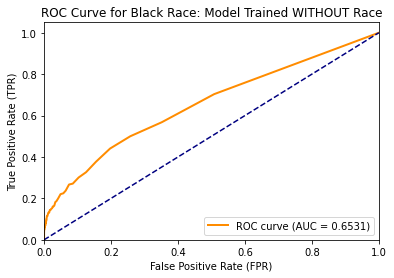

AUC White:  0.6994874848480241
95% Confidence Interval for AUC: [0.6798, 0.7179]


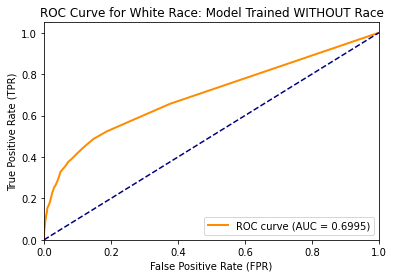

AUC Asian:  0.6637602179836513
95% Confidence Interval for AUC: [0.5826, 0.7426]


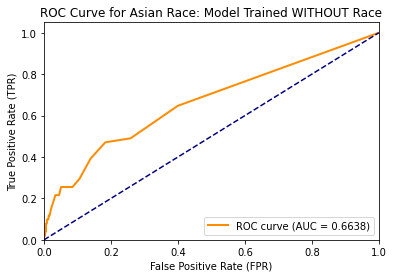

AUC Unknown:  0.6499561723886048
95% Confidence Interval for AUC: [0.5961, 0.6996]


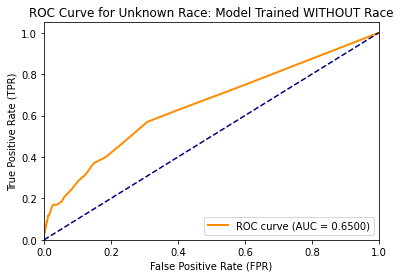

AUC Other:  0.7107947888568414
95% Confidence Interval for AUC: [0.6625, 0.7580]


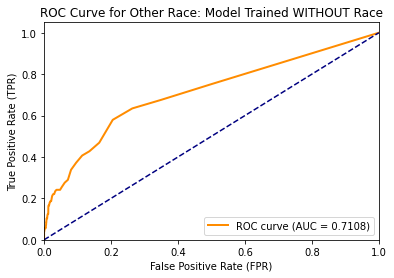

In [35]:
auc_black = calc_roc_auc('Black')
auc_white = calc_roc_auc('White')
auc_asian = calc_roc_auc('Asian')
auc_unk = calc_roc_auc('Unknown')
auc_other = calc_roc_auc('Other')